<a href="https://colab.research.google.com/github/ViktoriiaKharchenko/Neural-Networks/blob/master/ECGConv1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt # Отрисовка изображений


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization,Conv1D, GlobalAveragePooling1D, MaxPooling1D,Flatten
from sklearn.preprocessing import MinMaxScaler 
from tensorflow import keras


In [4]:
datasetPath = 'drive/MyDrive/Colab Notebooks/filteredData.csv'
resultPath = 'drive/MyDrive/Colab Notebooks/result.csv'

# X = pd.read_csv(datasetPath, delimiter=',')
# Y = pd.read_csv(resultPath, delimiter=',')
X = np.genfromtxt(datasetPath,delimiter=',')
Y = np.genfromtxt(resultPath,delimiter=',')

# X = np.array(X)
# Y = np.array(Y)
X.reshape(X.shape[0],9000,1)
print(X.shape)
print(Y)

(7561, 9000)
[0. 0. 0. ... 0. 0. 0.]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)  
# scale_features_std = StandardScaler() 
# x_train = scale_features_std.fit_transform(x_train) 
# x_test = scale_features_std.transform(x_test) 
# scale_features_mm = MinMaxScaler() 
# x_train = scale_features_mm.fit_transform(x_train) 
# x_test = scale_features_mm.transform(x_test)
x_train = x_train.reshape(x_train.shape[0],9000,1)
x_test = x_test.reshape(x_test.shape[0],9000,1)
print(x_train.shape)  
print(y_train.shape)  
print(y_train)

(6048, 9000, 1)
(6048,)
[0. 2. 0. ... 0. 0. 2.]


In [6]:
y_train = utils.to_categorical(y_train, 4)
y_test = utils.to_categorical(y_test, 4)
print(y_train.shape)


(6048, 4)


In [12]:
def create_model():
  model = Sequential()
  model.add(Conv1D(128, 55, activation='relu', input_shape=(9000, 1)))
  model.add(MaxPooling1D(10))
  model.add(Dropout(0.5))
  model.add(Conv1D(128, 25, activation='relu'))
  model.add(MaxPooling1D(5))
  model.add(Dropout(0.5))
  model.add(Conv1D(128, 10, activation='relu'))
  model.add(MaxPooling1D(5))
  model.add(Dropout(0.5))
  model.add(Conv1D(128, 5, activation='relu'))
  model.add(GlobalAveragePooling1D())
  #model.add(Flatten())
  model.add(Dense(256, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model  

In [13]:
# Создаём пустую сеть
model = create_model()

# Обучаем сеть
history = model.fit(x_train, 
          y_train,
          batch_size=300, 
          epochs=100,
          validation_split=0.2, # Указываем 20% случайных примеров для проверочной выборки
          verbose=1)

Epoch 1/100
17/17 [==============================] - 339s 20s/step - loss: 2.0770 - accuracy: 0.4110 - val_loss: 1.1256 - val_accuracy: 0.5868
Epoch 2/100
17/17 [==============================] - 338s 20s/step - loss: 1.0416 - accuracy: 0.5781 - val_loss: 1.0640 - val_accuracy: 0.5868
Epoch 3/100
17/17 [==============================] - 337s 20s/step - loss: 0.9565 - accuracy: 0.5942 - val_loss: 0.9358 - val_accuracy: 0.5868
Epoch 4/100
17/17 [==============================] - 337s 20s/step - loss: 0.9184 - accuracy: 0.6045 - val_loss: 0.9200 - val_accuracy: 0.5868
Epoch 5/100
17/17 [==============================] - 336s 20s/step - loss: 0.8951 - accuracy: 0.5993 - val_loss: 0.9372 - val_accuracy: 0.5868
Epoch 6/100
17/17 [==============================] - 335s 20s/step - loss: 0.9253 - accuracy: 0.6016 - val_loss: 0.8991 - val_accuracy: 0.5868
Epoch 7/100
17/17 [==============================] - 335s 20s/step - loss: 0.8730 - accuracy: 0.6070 - val_loss: 0.8674 - val_accuracy: 0.5868

In [14]:
model.save_weights('model.h5')
scores = model.evaluate(x_test, y_test, verbose=1)
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

48/48 [==============================] - 27s 554ms/step - loss: 0.4760 - accuracy: 0.8308
[0.47599706053733826, 0.8307997584342957]
Доля верных ответов на тестовых данных, в процентах: 83.08%


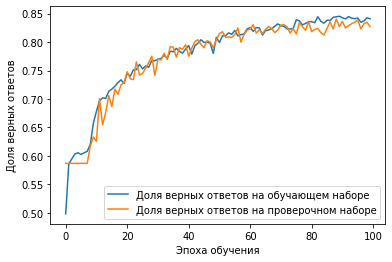

In [15]:
# Выводим график точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Выводим график точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Выводим подписи осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Выводим легенду
plt.legend()
plt.show()

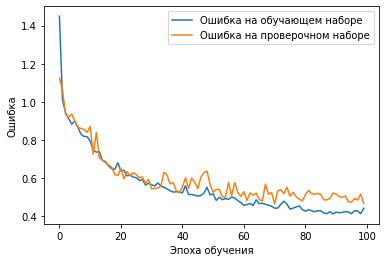

In [16]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()